c:\Users\gdeng\miniconda3\envs\savorclinic2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


498.7449999999993
Species index mapping:
  [ 0] Glycerol
  [ 1] h2o
  [ 2] N08D00
  [ 3] G_EMPTY_EMPTY_N08D00
  [ 4] G_EMPTY_N08D00_EMPTY
  [ 5] G_EMPTY_N08D00_N08D00
  [ 6] G_N08D00_EMPTY_N08D00
  [ 7] G_N08D00_N08D00_N08D00

First few reactions and stoichiometry rows:
  0: Glyceride + N08D00 => G_EMPTY_EMPTY_N08D00 + h2o
    Reactants: [0 2]
    Products:  [1 3]
  1: Glyceride + N08D00 => G_EMPTY_N08D00_EMPTY + h2o
    Reactants: [0 2]
    Products:  [1 4]
  2: G_EMPTY_EMPTY_N08D00 + N08D00 => G_EMPTY_N08D00_N08D00 + h2o
    Reactants: [2 3]
    Products:  [1 5]
  3: G_EMPTY_EMPTY_N08D00 + N08D00 => G_N08D00_EMPTY_N08D00 + h2o
    Reactants: [2 3]
    Products:  [1 6]
  4: Glyceride + N08D00 => G_EMPTY_N08D00_N08D00 + h2o
    Reactants: [2 4]
    Products:  [1 5]

Printing species names: ['Glycerol', 'h2o', 'N08D00', 'G_EMPTY_EMPTY_N08D00', 'G_EMPTY_N08D00_EMPTY', 'G_EMPTY_N08D00_N08D00', 'G_N08D00_EMPTY_N08D00', 'G_N08D00_N08D00_N08D00']
Printing reaction stoichiometry:
Reactants:
[

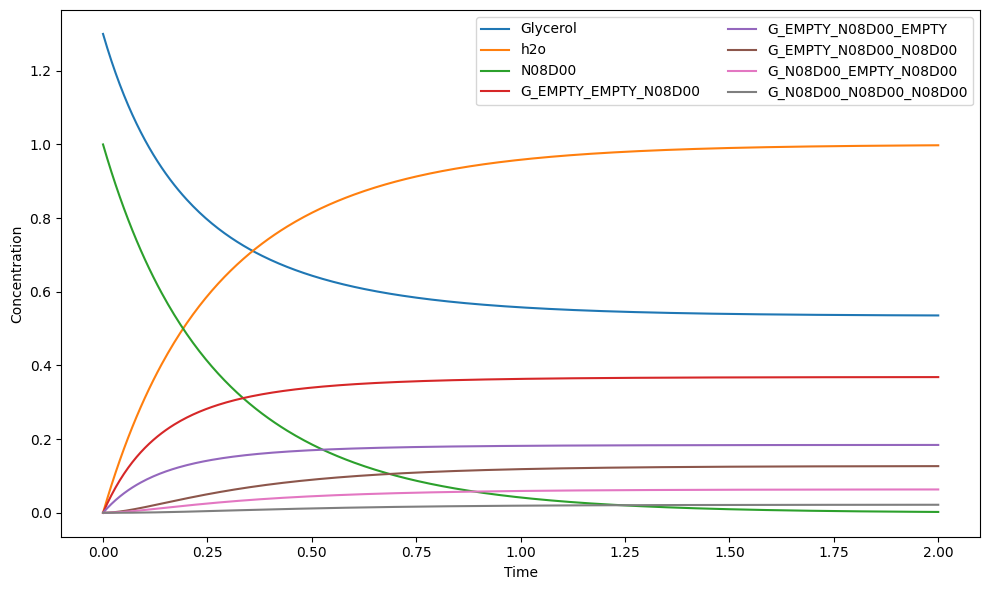

In [1]:
# testing esterification
from glyze import FattyAcid, Glyceride, ChemReactSim

fa7 = FattyAcid(length=7)
fa8 = FattyAcid(length=8)
fa9 = FattyAcid(length=9)
fa10 = FattyAcid(length=10)
fa11 = FattyAcid(length=11)
fa12 = FattyAcid(length=12)
fm7 = fa7.molar_mass
fm10 = fa10.molar_mass
mct = Glyceride(sn=(fa8, fa8, fa10))
mctm = mct.molar_mass
print(mctm)

# sim = ChemReactSim.p_kinetic_esterification(list_of_fa=[fa7, fa8, fa9, fa10, fa11, fa12], initial_conc = [110, 7.5, 22.4, 29.5, 21.2, 13.7, 5.8], chem_flag=True)
# sim = ChemReactSim.p_kinetic_esterification(list_of_fa=[fatty_acid1, fatty_acid2, fatty_acid3, fatty_acid4, fatty_acid5, fatty_acid6], initial_conc = [1,1,1,1,1,1,1], chem_flag=True)
# sim.overall_order = 2.
sim = ChemReactSim.p_kinetic_esterification(list_of_fa=[fa8], initial_conc = [1.3, 1], chem_flag=True)
sol = sim.solve(t_span=(0.0, 2))
# y_t2 = sol.sol(2.0)  # returns full state vector at t=2
# print(y_t2)
sim.plot(sol=sol)